# BILLUPS DATA SCIENCE CHALLENGE
##### - Akshat Mathur


### Objective
The objective is to analyze the library's data to understand the rate of late book returns and identify any factors contributing to this issue. Based on the findings, we will provide actionable recommendations to the library to mitigate late returns and develop a proactive monitoring strategy.

### Key Questions
- What is the rate of late returns?
    - What percentage of total check-outs are late returns?
- What factors are connected with late returns?
    - Do borrower demographics (e.g., age group, gender, region) correlate with late returns?
- What recommendations can be made to mitigate the risk of late returns?
    - Are there policy changes or incentives that could reduce late returns?
    - Should the library implement reminders or penalties to encourage timely returns?
    - Can the library optimize their monitoring system to identify potential late returns earlier?

#### Key points - 
- The books table has no relation with other tables. Hence, the late returns does not depend on the type of book the customers checkout out.


### Steps involved - 
- Data Preprocessing and cleaning (done in preprocessing.ipynb)
- Combining all csvs into one (join them based on the Foreign Keys and references)
- Perform Exploratory Data Analysis

In [1]:
# Package imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

pd.options.mode.chained_assignment = None

C:\Users\aksha\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\aksha\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Merge all tables to the Checkouts table based on the customer id (patron id) and library id 

In [2]:
libraries_df = pd.read_csv("data/cleaned_libraries.csv")
checkouts_df = pd.read_csv("data/cleaned_checkouts.csv")
customers_df = pd.read_csv("data/cleaned_customers.csv")

# Joining 'checkouts' with 'customers' on 'patron_id' and 'id'
checkouts_customers_df = pd.merge(checkouts_df, customers_df, left_on='patron_id', right_on='id', suffixes=('_checkout', '_customer'))

# Joining the resulting DataFrame with 'libraries' on 'library_id' and 'id'
combined_df = pd.merge(checkouts_customers_df, libraries_df, left_on='library_id', right_on='id', suffixes=(None, '_library'))


In [3]:
combined_df[:5]

,Unnamed: 0_checkout,id_checkout,patron_id,library_id,date_checkout,date_returned,Unnamed: 0_customer,id_customer,name,street_address,...,education,occupation,Unnamed: 0.1,Unnamed: 0,id,name_library,street_address_library,city_library,region,postal_code
0,0,-xFj0vTLbRIC,b071c9c68228a2b1d00e6f53677e16da,225-222@5xc-jtz-hkf,2019-01-28,2018-11-13,586,b071c9c68228a2b1d00e6f53677e16da,Rachelle Miller,73 Ne Cook St,...,NaN,Tech,12,12,225-222@5xc-jtz-hkf,Multnomah County Library,216 Ne Knott St,Portland,OR,NaN
1,1,HUX-y4oXl04C,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12,1418,8d3f63e1deed89d7ba1bf6a4eb101373,Jeanette Nelms,4942 Se 28Th Ave,...,Graduate Degree,Tech,5,5,223-222@5xc-jxr-tgk,Multnomah County Library Woodstock,6008 Se 49Th Ave,Portland,OR,97206.0
2,2,TQpFnkku2poC,4ae202f8de762591734705e0079d76df,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24,705,4ae202f8de762591734705e0079d76df,Melvin Jackson,2821 Ne Klickitat St,...,Graduate Degree,Education & Health,11,11,228-222@5xc-jtz-hwk,Multnomah County Library,205 Ne Russell St,Portland,OR,97212.0
3,3,OQ6sDwAAQBAJ,f9372de3c8ea501601aa3fb59ec0f524,23v-222@5xc-jv7-v4v,2018-01-15,2018-04-25,53,f9372de3c8ea501601aa3fb59ec0f524,James Klein,1720 N Shaver St,...,Graduate Degree,Sales,1,1,23v-222@5xc-jv7-v4v,Multnomah County Library Northwest,2300 Nw Thurman St,Portland,OR,NaN
4,4,7T9-BAAAQBAJ,2cf3cc3b9e9f6c608767da8d350f77c9,225-222@5xc-jtz-hkf,2018-12-31,1804-01-23,1149,2cf3cc3b9e9f6c608767da8d350f77c9,Lani Alvarez,7845 Ne Alberta St,...,Others,Business & Finance,12,12,225-222@5xc-jtz-hkf,Multnomah County Library,216 Ne Knott St,Portland,OR,NaN


In [4]:
# Dropping duplicate 'id' columns
combined_df = combined_df.drop(columns=['Unnamed: 0_checkout', 'Unnamed: 0_customer', 'id_customer', 'Unnamed: 0', 'id' ])

# Rename columns to maintain consistency and for better understanding
combined_df.rename(columns = {"library_id": "id_library", "patron_id": "id_customer", "name": "name_customer", "street_address": "street_address_customer",
                              "city": "city_customer", "state": "state_customer", "zipcode": "zipcode_customer", "birth_date": "birth_date_customer",
                              "gender": "customer_gender", 'education': "customer_education", 'occupation': "customer_occupation",
                              "region": "region_library", "postal_code": "postal_code_library"}, inplace=True)

In [5]:
# Final list of columns
combined_df.columns

Index(['id_checkout', 'id_customer', 'id_library', 'date_checkout',
       'date_returned', 'name_customer', 'street_address_customer',
       'city_customer', 'state_customer', 'zipcode_customer',
       'birth_date_customer', 'customer_gender', 'customer_education',
       'customer_occupation', 'Unnamed: 0.1', 'name_library',
       'street_address_library', 'city_library', 'region_library',
       'postal_code_library'],
      dtype='object')

In [6]:
# Save the combined DataFrame
combined_df.to_csv("data/combined_records.csv")

In [7]:
combined_df['zipcode_customer']

0       97212.0
1       97202.0
2       97212.0
3       97227.0
4       97218.0
         ...   
1995    97214.0
1996    97267.0
1997    97218.0
1998    97266.0
1999    97232.0
Name: zipcode_customer, Length: 2000, dtype: float64

# ----------------------------------------------------------------------------------

#### Let's calculate the number of days a book was borrowed and if they were returned late or not

In [8]:
library_records_df = pd.read_csv("data/combined_records.csv")

In [9]:
library_records_df.shape

(2000, 21)

In [10]:
# Convert columns to datetime
library_records_df['date_checkout'] = pd.to_datetime(library_records_df['date_checkout'])
library_records_df['date_returned'] = pd.to_datetime(library_records_df['date_returned'])
library_records_df['num_days'] = (library_records_df['date_returned'] - library_records_df['date_checkout']).dt.days

In [11]:
# Function to determine if the return is late
def determine_lateness(row):
    if pd.isna(row['date_checkout']): # No information available on the borrowing date
        return 'Unknown'
    elif pd.isna(row['date_returned']): # Assuming books that are currently out and not yet returned. Hence, absence of a return date
        return 'Not Returned Yet'
    elif row['num_days'] > 28: # Books returned after the 28-day period
        return 'Late'
    elif row['num_days'] < 0:
        return 'System Error' # Return date is recorded as before the checkout date
    else:
        return 'On Time' # Books returned within 28 days


library_records_df['return_status'] = library_records_df.apply(determine_lateness, axis=1)

In [12]:
library_records_df

,Unnamed: 0,id_checkout,id_customer,id_library,date_checkout,date_returned,name_customer,street_address_customer,city_customer,state_customer,...,customer_education,customer_occupation,Unnamed: 0.1,name_library,street_address_library,city_library,region_library,postal_code_library,num_days,return_status
0,0,-xFj0vTLbRIC,b071c9c68228a2b1d00e6f53677e16da,225-222@5xc-jtz-hkf,2019-01-28,2018-11-13,Rachelle Miller,73 Ne Cook St,Portland,Oregon,...,NaN,Tech,12,Multnomah County Library,216 Ne Knott St,Portland,OR,NaN,-76.0,System Error
1,1,HUX-y4oXl04C,8d3f63e1deed89d7ba1bf6a4eb101373,223-222@5xc-jxr-tgk,2018-05-29,2018-06-12,Jeanette Nelms,4942 Se 28Th Ave,Portland,Oregon,...,Graduate Degree,Tech,5,Multnomah County Library Woodstock,6008 Se 49Th Ave,Portland,OR,97206.0,14.0,On Time
2,2,TQpFnkku2poC,4ae202f8de762591734705e0079d76df,228-222@5xc-jtz-hwk,2018-11-23,2019-01-24,Melvin Jackson,2821 Ne Klickitat St,Portland,Oregon,...,Graduate Degree,Education & Health,11,Multnomah County Library,205 Ne Russell St,Portland,OR,97212.0,62.0,Late
3,3,OQ6sDwAAQBAJ,f9372de3c8ea501601aa3fb59ec0f524,23v-222@5xc-jv7-v4v,2018-01-15,2018-04-25,James Klein,1720 N Shaver St,Portland,Oregon,...,Graduate Degree,Sales,1,Multnomah County Library Northwest,2300 Nw Thurman St,Portland,OR,NaN,100.0,Late
4,4,7T9-BAAAQBAJ,2cf3cc3b9e9f6c608767da8d350f77c9,225-222@5xc-jtz-hkf,2018-12-31,1804-01-23,Lani Alvarez,7845 Ne Alberta St,Portland,Oregon,...,Others,Business & Finance,12,Multnomah County Library,216 Ne Knott St,Portland,OR,NaN,-78505.0,System Error
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,rNbuDwAAQBAJ,91871955f3641857832766ac3f5a0b95,222-222@5xc-jv5-nt9,2018-07-19,2018-08-12,Brian Ward,35 Se 32Nd Ave,Portland,Oregon,...,Graduate Degree,Education & Health,13,Multnomah County Library North Portland,512 N Killingsworth St,Portland,OR,97217.0,24.0,On Time
1996,1996,rcrCAgAAQBAJ,ad08956eb20efb746af650f906d439cf,22d-222@5xc-kcy-8sq,2018-03-07,2018-03-13,Eva Stone,14855 Se Rancho Ave,Portland,Oregon,...,High School,Education & Health,4,Multnomah County Library Sellwood Moreland,7860 Se 13Th Ave,Portland,OR,97202.0,6.0,On Time
1997,1997,F44fAQAAMAAJ,026262cc3454149303074c4113b5f118,226-222@5xc-jxj-7yv,2018-06-17,2018-06-27,Annie Holland,4436 Ne Jarrett St,Portland,Oregon,...,High School,Education & Health,8,Multnomah County Library Belmont,1038 Se Cesar E Chavez Blvd,Portland,OR,97214.0,10.0,On Time
1998,1998,Ci1HAQAAMAAJ,08b29865e58e9b2aabff9684a703acf0,223-222@5xc-jxr-tgk,2018-12-10,2018-12-29,Juan Gates,3232 Se 112Th Ave,Portland,Oregon,...,Graduate Degree,NaN,5,Multnomah County Library Woodstock,6008 Se 49Th Ave,Portland,OR,97206.0,19.0,On Time


Visualizing the status of the books borrowed from the library

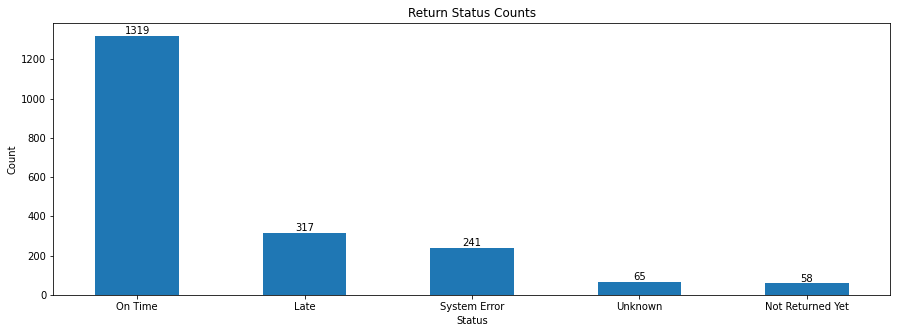

In [13]:
return_status = library_records_df['return_status'].value_counts()

# Plotting the counts
plt.figure(figsize=(15, 5))
ax = return_status.plot(kind='bar')

# Annotate bars with counts
for i, count in enumerate(return_status):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Return Status Counts')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Implications of the status of returns - 

On Time Returns
- Indicates the majority of borrowers adhere to return policies

Late Returns
- Needs strategies to improve timely returns
- Possible causes: borrower forgetfulness, lack of reminders, or leniency in enforcement (no late fee imposed on borrowers)

System Errors
- Critical to address for accurate data tracking
- May require system updates or training for staff on correct data entry procedures

Unknown Borrow Dates
- Hinders effective tracking and management of library resources

Not Returned Yet
- Reflects ongoing borrowing activity

### General recommendations on improvement - 

1. Enhanced Reminder Systems - Implement automated reminders for due dates to reduce late returns

2. Audit and correct existing system errors - Regular training for staff on proper data entry

3. Reinforce policies to encourage timely returns - Consider fines or penalties for late returns

4. Ensure all borrow and return dates are accurately recorded - Investigate and resolve reasons for 'Unknown' status

In [14]:
library_records_df.to_csv("data/library_records_status.csv")

# ----------------------------------------------------------------------------------

### Analyzing the reasons behind the status per library (each postal code)

In [15]:
library_records_df = pd.read_csv("data/library_records_status.csv")

In [16]:
library_records_df.shape

(2000, 24)

In [17]:
library_records_df.drop(columns=['Unnamed: 0.2', 'Unnamed: 0'], inplace=True)

In [18]:
# For reference
library_records_df.columns

Index(['id_checkout', 'id_customer', 'id_library', 'date_checkout',
       'date_returned', 'name_customer', 'street_address_customer',
       'city_customer', 'state_customer', 'zipcode_customer',
       'birth_date_customer', 'customer_gender', 'customer_education',
       'customer_occupation', 'Unnamed: 0.1', 'name_library',
       'street_address_library', 'city_library', 'region_library',
       'postal_code_library', 'num_days', 'return_status'],
      dtype='object')

In [19]:
# Analyzing only the late and on time returns
# returns = library_records_df[(library_records_df["return_status"] == "Late") | (library_records_df["return_status"] == "On Time")]
# returns[:5]

In [20]:
returns_library = library_records_df[['date_checkout', 'date_returned', 'postal_code_library', 'num_days', 'return_status']]
returns_library

,date_checkout,date_returned,postal_code_library,num_days,return_status
0,2019-01-28,2018-11-13,NaN,-76.0,System Error
1,2018-05-29,2018-06-12,97206.0,14.0,On Time
2,2018-11-23,2019-01-24,97212.0,62.0,Late
3,2018-01-15,2018-04-25,NaN,100.0,Late
4,2018-12-31,1804-01-23,NaN,-78505.0,System Error
...,...,...,...,...,...
1995,2018-07-19,2018-08-12,97217.0,24.0,On Time
1996,2018-03-07,2018-03-13,97202.0,6.0,On Time
1997,2018-06-17,2018-06-27,97214.0,10.0,On Time
1998,2018-12-10,2018-12-29,97206.0,19.0,On Time


Imputing Null values of postal codes with a dummy value 

In [21]:
returns_library = returns_library.fillna({"postal_code_library": "Unknown"})

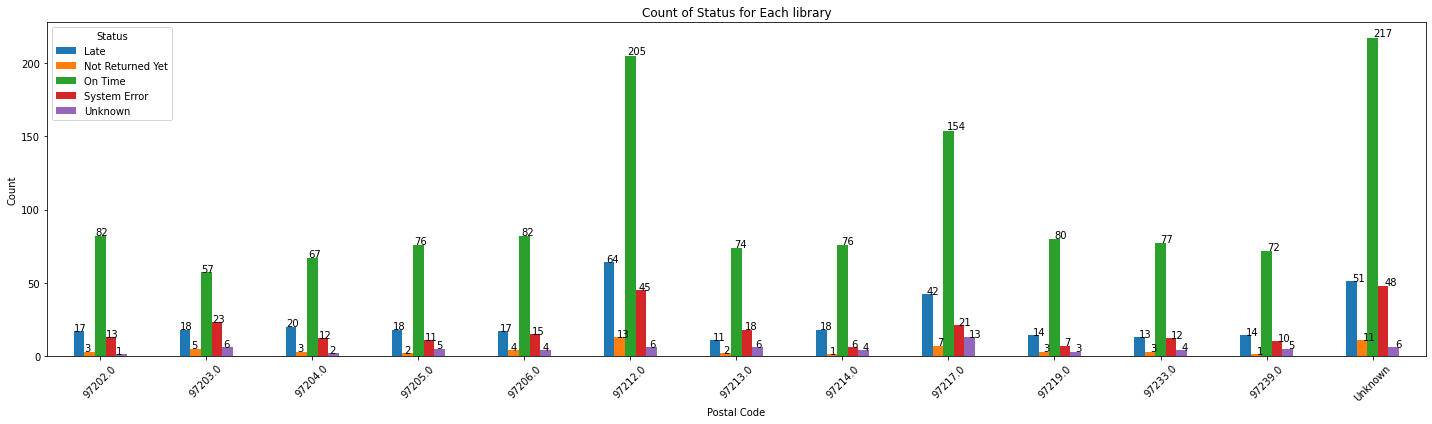

In [22]:
count_df = returns_library.groupby(['postal_code_library', 'return_status']).size().unstack()

ax = count_df.plot(kind='bar', stacked=False, figsize=(20, 6))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xlabel('Postal Code')
plt.ylabel('Count')
plt.title('Count of Status for Each library')
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
sum_within_lib_df = count_df.sum(axis=1)
sum_within_lib_df

postal_code_library
97202.0    116
97203.0    109
97204.0    104
97205.0    112
97206.0    122
97212.0    333
97213.0    111
97214.0    105
97217.0    237
97219.0    107
97233.0    109
97239.0    102
Unknown    333
dtype: int64

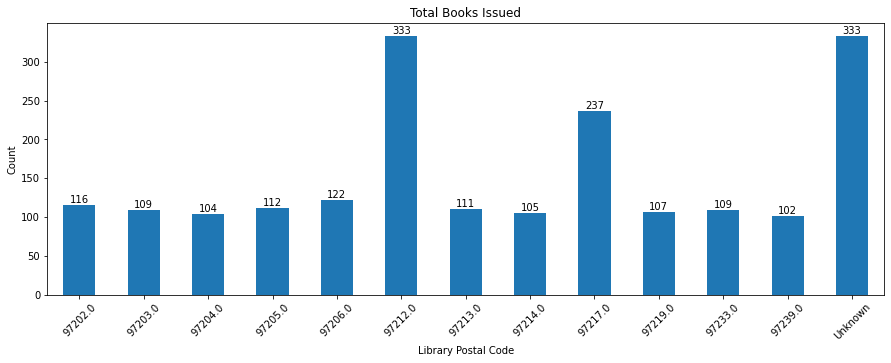

In [24]:
sum_within_lib_df = count_df.sum(axis=1)

# Plotting the counts
plt.figure(figsize=(15, 5))
ax = sum_within_lib_df.plot(kind='bar')

# Annotate bars with counts
for i, count in enumerate(sum_within_lib_df):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Total Books Issued')
plt.xlabel('Library Postal Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Here you can see that the library at 97212 is the busiest with the most number of books issued to the public while others are almost equally popular in terms of renting books. It may be the case that the resident population at 97212 postal code is the highest in the city of Portland. 

In [25]:
count_df

return_status,Late,Not Returned Yet,On Time,System Error,Unknown
postal_code_library,,,,,
97202.0,17,3,82,13,1
97203.0,18,5,57,23,6
97204.0,20,3,67,12,2
97205.0,18,2,76,11,5
97206.0,17,4,82,15,4
97212.0,64,13,205,45,6
97213.0,11,2,74,18,6
97214.0,18,1,76,6,4
97217.0,42,7,154,21,13


In [26]:
ratio_within_lib_df = count_df.div(count_df.sum(axis=1), axis=0) * 100

ratio_across_lib_df = count_df.div(count_df.sum(axis=0), axis=1) * 100

In [27]:
ratio_within_lib_df

return_status,Late,Not Returned Yet,On Time,System Error,Unknown
postal_code_library,,,,,
97202.0,14.655172,2.586207,70.689655,11.206897,0.862069
97203.0,16.513761,4.587156,52.293578,21.100917,5.504587
97204.0,19.230769,2.884615,64.423077,11.538462,1.923077
97205.0,16.071429,1.785714,67.857143,9.821429,4.464286
97206.0,13.934426,3.278689,67.213115,12.295082,3.278689
97212.0,19.219219,3.903904,61.561562,13.513514,1.801802
97213.0,9.909910,1.801802,66.666667,16.216216,5.405405
97214.0,17.142857,0.952381,72.380952,5.714286,3.809524
97217.0,17.721519,2.953586,64.978903,8.860759,5.485232


In [28]:
ratio_across_lib_df

return_status,Late,Not Returned Yet,On Time,System Error,Unknown
postal_code_library,,,,,
97202.0,5.362776,5.172414,6.216831,5.394191,1.538462
97203.0,5.678233,8.620690,4.321456,9.543568,9.230769
97204.0,6.309148,5.172414,5.079606,4.979253,3.076923
97205.0,5.678233,3.448276,5.761941,4.564315,7.692308
97206.0,5.362776,6.896552,6.216831,6.224066,6.153846
97212.0,20.189274,22.413793,15.542077,18.672199,9.230769
97213.0,3.470032,3.448276,5.610311,7.468880,9.230769
97214.0,5.678233,1.724138,5.761941,2.489627,6.153846
97217.0,13.249211,12.068966,11.675512,8.713693,20.000000


In [29]:
diff = float('-inf')
best_lib = 0.0
for i, row in ratio_within_lib_df.iterrows():
    # print(i, row)
    diff_temp = row['On Time'] - row['Late']
    if diff_temp > diff:
        best_lib = i
        diff = diff_temp
    print(best_lib, diff)
        
best_lib, diff

97202.0 56.03448275862069
97202.0 56.03448275862069
97202.0 56.03448275862069
97202.0 56.03448275862069
97202.0 56.03448275862069
97202.0 56.03448275862069
97213.0 56.756756756756744
97213.0 56.756756756756744
97213.0 56.756756756756744
97219.0 61.68224299065421
97219.0 61.68224299065421
97219.0 61.68224299065421
97219.0 61.68224299065421


(97219.0, 61.68224299065421)

- Book Rental Status Across Libraries (Based on just counts)

    This analysis does not account for the 'Unknown' data since those numbers can actually be from any of the other libraries (postal codes).

    On Time Returns: The highest count of 'On Time' returns is in the postal code 97212 with 205 returns, accounting for 61.5% of its total transactions. The lowest is in 97203 with 57 returns, which represents 52.3% of its transactions.

    Late Returns: Postal code 97212 also has the highest number of 'Late' returns with 64, which is 19.22% of its total transactions. The lowest is in 97213 with 11 late returns, making up 9.9% of its transactions.

    System Error: Postal code 97212 has the most 'System Error' entries with 45, representing 13.5% of its transactions. The lowest is in 97214 with 6 errors, making up 5.71% of its transactions.

    On the other hand, considering the ratio of Timely returns and Late returns, the best performing library is 97219 while the worst is 97203 with relatively higher late returns and fewer timely returns. 

- Across all libraries, the one at 97212 is the bussiest with the most number of borrowed books, timely returns and late returns.

- A significant portion of the records were entered incorrectly, resulting in 333 books with unknown library affiliations. The logging system needs to be audited to identify potential issues. This could be due to either a lack of proper training on how to use the system or problems within the system itself.

# ----------------------------------------------------------------------------------

### Analyzing the relation between the library and the customers renting books

In [30]:
customer_library_df = library_records_df[['postal_code_library', 'city_customer', 'state_customer', 'zipcode_customer',
                                          'birth_date_customer', 'customer_gender', 'customer_education', 'customer_occupation', 'num_days', 'return_status']]
# customer_library_df.shape

In [31]:
customer_library_df

,postal_code_library,city_customer,state_customer,zipcode_customer,birth_date_customer,customer_gender,customer_education,customer_occupation,num_days,return_status
0,NaN,Portland,Oregon,97212.0,NaN,Female,NaN,Tech,-76.0,System Error
1,97206.0,Portland,Oregon,97202.0,1965-01-24,Female,Graduate Degree,Tech,14.0,On Time
2,97212.0,Portland,Oregon,97212.0,1963-11-04,Male,Graduate Degree,Education & Health,62.0,Late
3,NaN,Portland,Oregon,97227.0,2119-02-10,Male,Graduate Degree,Sales,100.0,Late
4,NaN,Portland,Oregon,97218.0,2103-05-19,Female,Others,Business & Finance,-78505.0,System Error
...,...,...,...,...,...,...,...,...,...,...
1995,97217.0,Portland,Oregon,97214.0,2120-08-25,Male,Graduate Degree,Education & Health,24.0,On Time
1996,97202.0,Portland,Oregon,97267.0,1967-10-17,Female,High School,Education & Health,6.0,On Time
1997,97214.0,Portland,Oregon,97218.0,1812-03-13,Female,High School,Education & Health,10.0,On Time
1998,97206.0,Portland,Oregon,97266.0,1980-08-23,Male,Graduate Degree,NaN,19.0,On Time


Analyzing the distribution of customers belonging to the same neghbourhood (same postal region) or are outsiders (from different postal codes)

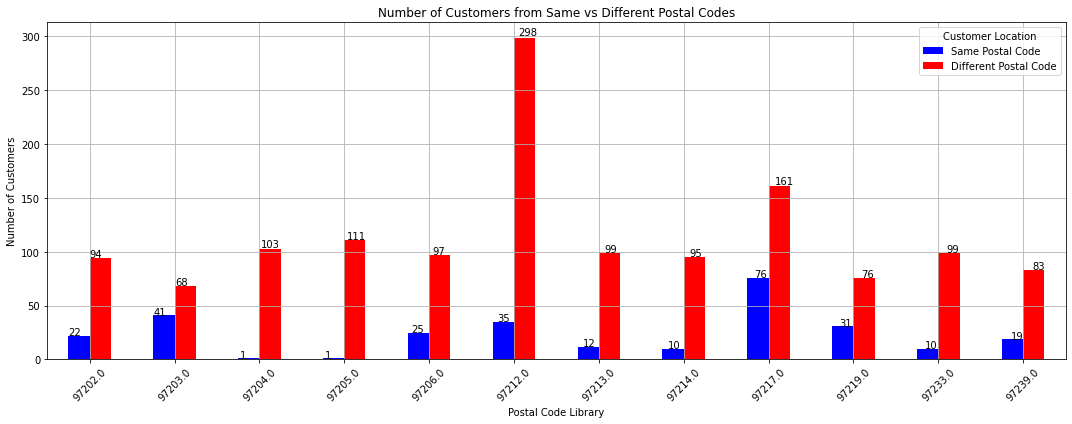

In [32]:
match_df = customer_library_df[['postal_code_library', 'zipcode_customer']]
match_df = match_df.apply(pd.to_numeric)

same_postal_code = match_df[match_df['postal_code_library'] == match_df['zipcode_customer']].groupby('postal_code_library').size()
different_postal_code = match_df[match_df['postal_code_library'] != match_df['zipcode_customer']].groupby('postal_code_library').size()

# Combine the counts into a single DataFrame
counts_df = pd.DataFrame({
    'Same Postal Code': same_postal_code,
    'Different Postal Code': different_postal_code
}).fillna(0).astype(int)

# Step 2: Plot the data
ax = counts_df.plot(kind='bar', figsize=(15, 6), color=['blue', 'red'])

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.xlabel('Postal Code Library')
plt.ylabel('Number of Customers')
plt.title('Number of Customers from Same vs Different Postal Codes')
plt.legend(title='Customer Location')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

As seen in the above plot, majority of the customers at each librray belong from a different area/location

Analyze what proportion of customers visited a library at a different location instead of the one present in their area

In [33]:
unique_libraries = match_df['postal_code_library'].unique()
unique_libraries

array([   nan, 97206., 97212., 97217., 97239., 97213., 97219., 97204.,
       97233., 97214., 97205., 97202., 97203.])

In [34]:
metadata = {}

for lib in unique_libraries:
    df_lib = match_df[match_df['postal_code_library'] == lib]
    counter = Counter(df_lib['zipcode_customer'].tolist())
    
    metadata[lib] = dict(counter)
    
sorted_trimmed_data = {}

for key, inner_dict in metadata.items():
    sorted_inner_dict = dict(sorted(inner_dict.items(), key=lambda item: item[1], reverse=True)[:5])
    sorted_trimmed_data[key] = sorted_inner_dict
    
sorted_trimmed_data

{nan: {},
 97206.0: {97206.0: 25, 97202.0: 24, 97222.0: 14, 97266.0: 12, 97086.0: 10},
 97212.0: {97217.0: 38, 97212.0: 35, 97213.0: 30, 97214.0: 27, 97211.0: 26},
 97217.0: {97217.0: 76, 97211.0: 26, 97203.0: 22, 97212.0: 12, 97210.0: 11},
 97239.0: {97219.0: 29, 97239.0: 19, 97225.0: 10, 97223.0: 9, 97034.0: 5},
 97213.0: {97220.0: 28, 97218.0: 25, 97213.0: 12, 97211.0: 8, 97230.0: 8},
 97219.0: {97219.0: 31, 97035.0: 16, 97223.0: 12, 97224.0: 9, 97062.0: 7},
 97204.0: {97201.0: 9, 97210.0: 8, 97221.0: 7, 97209.0: 6, 97232.0: 6},
 97233.0: {97230.0: 21, 97220.0: 14, 97233.0: 10, 97266.0: 10, 97206.0: 9},
 97214.0: {97202.0: 12, 97214.0: 10, 97220.0: 10, 97218.0: 9, 97212.0: 6},
 97205.0: {97210.0: 15, 97201.0: 10, 97217.0: 9, 97239.0: 9, 97232.0: 6},
 97202.0: {97222.0: 27, 97202.0: 22, 97219.0: 18, 97239.0: 10, 97206.0: 8},
 97203.0: {97203.0: 41, 97217.0: 22, 97231.0: 13, 97210.0: 9, 97211.0: 7}}

The above presents the number of customers visiting the library residing in the same area (zipcode) and from other areas.

Customers residing in 97213 are visiting the library in 97212 instead.
No one from 97204 is going to the library present in that area (maybe not a residential area).
Great amount of people from 97202 are going to 97206 and 97214
97217 is a well-established library, potentially offering a variety of services and resources that meet diverse needs. Hence a large number of visits.

#### Analyze relation between late returns and people demographics

In [35]:
demographics_df = customer_library_df[['postal_code_library', 'zipcode_customer', 'birth_date_customer', 'customer_gender', 'customer_education', 
                                       'customer_occupation', 'return_status']]

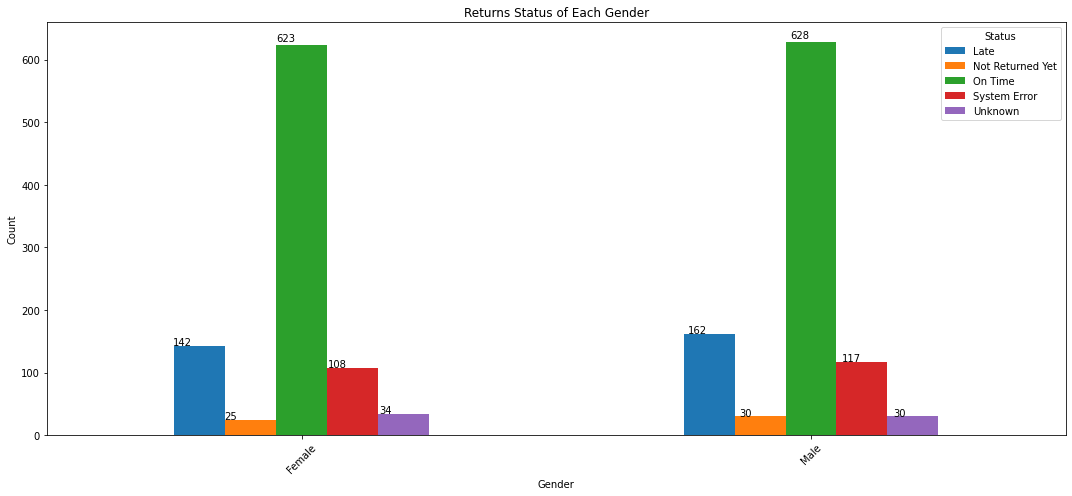

In [36]:
# Gender distribution vs return status

late_returns_gender = demographics_df[['customer_gender', 'return_status']]

count_df = late_returns_gender.groupby(['customer_gender', 'return_status']).size().unstack()

ax = count_df.plot(kind='bar', stacked=False, figsize=(15, 7))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Returns Status of Each Gender')
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the above plot, the distribution seems the same and the late returns does not depend on the gender of the book lender. 

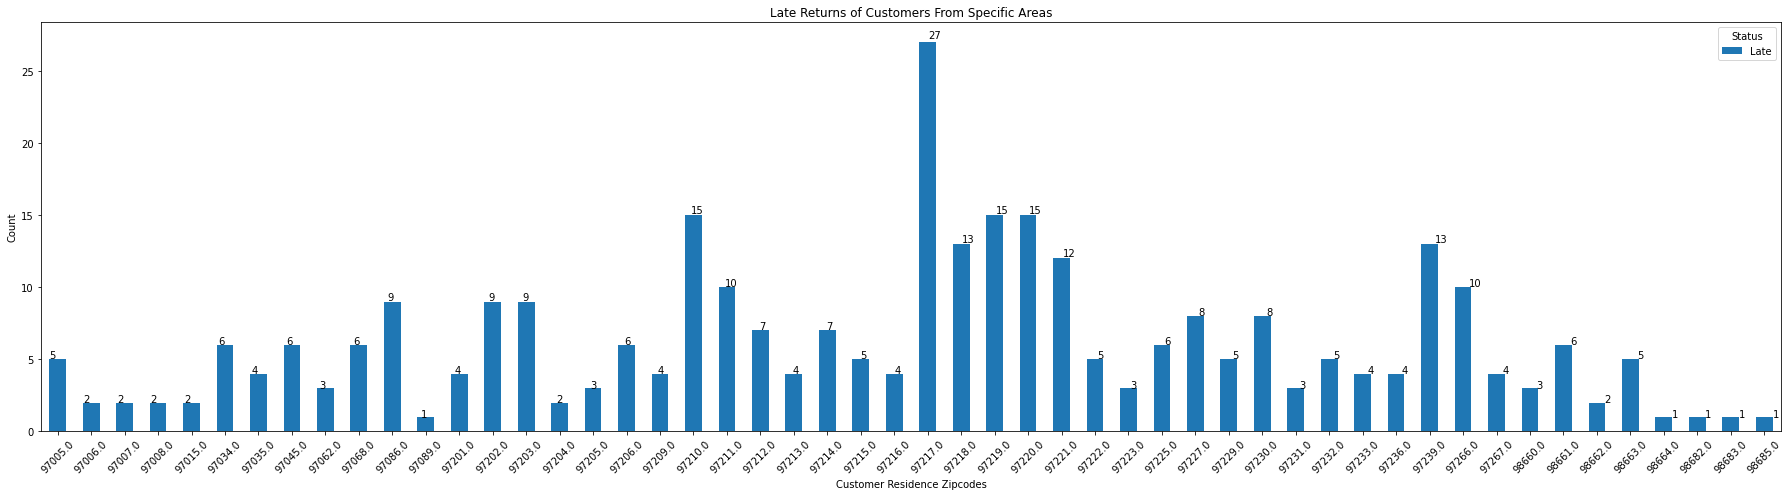

In [37]:
# Customer Location vs Return Status

late_returns_location = demographics_df[['zipcode_customer', 'return_status']]
late_returns_location = late_returns_location[late_returns_location['return_status'] == "Late"]

count_df = late_returns_location.groupby(['zipcode_customer', 'return_status']).size().unstack()

ax = count_df.plot(kind='bar', stacked=False, figsize=(25, 7))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.xlabel('Customer Residence Zipcodes')
plt.ylabel('Count')
plt.title('Late Returns of Customers From Specific Areas')
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As it can be seen, the most amount of late returns are from customers residing in area 97217 and have visited libraries in 97217 itself and 97212.

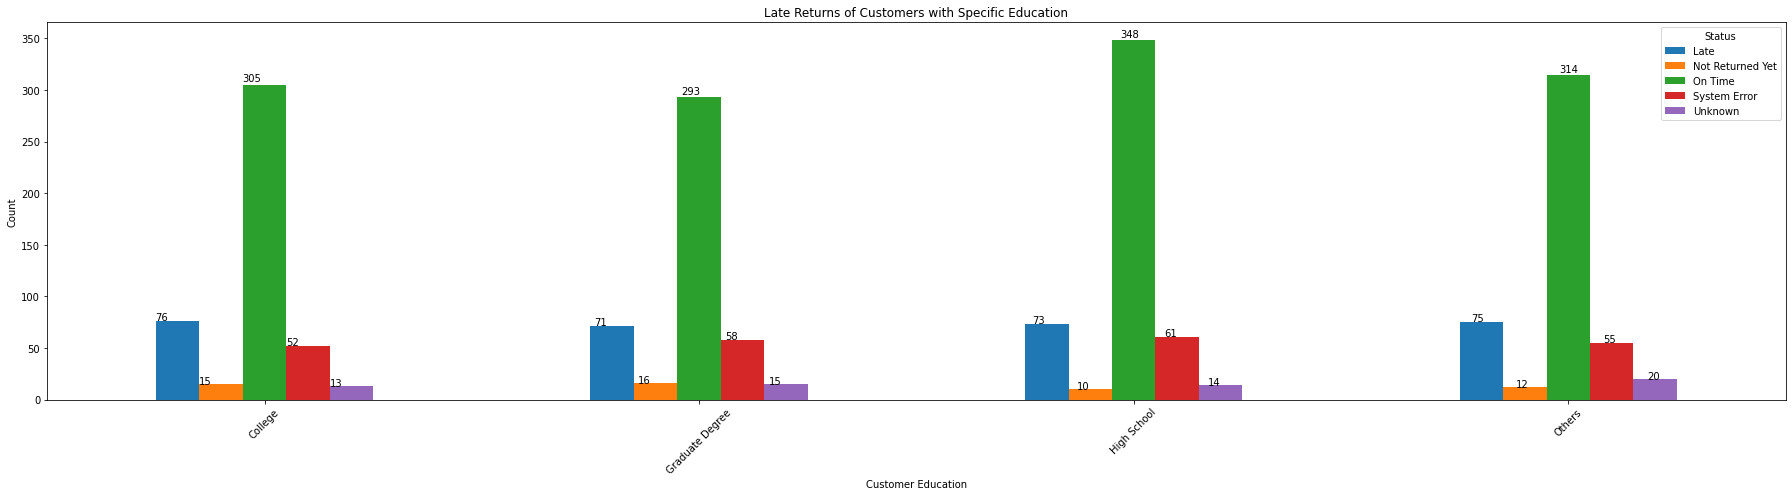

In [38]:
# Customer Education vs Return Status

late_returns_education = demographics_df[['customer_education', 'return_status']]
# late_returns_education = late_returns_education[late_returns_education['return_status'] == "Late"]

count_df = late_returns_education.groupby(['customer_education', 'return_status']).size().unstack()

ax = count_df.plot(kind='bar', stacked=False, figsize=(25, 7))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.xlabel('Customer Education')
plt.ylabel('Count')
plt.title('Late Returns of Customers with Specific Education')
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribution is quite similar for all types of educated customers. Hence nothing can be determined by this.

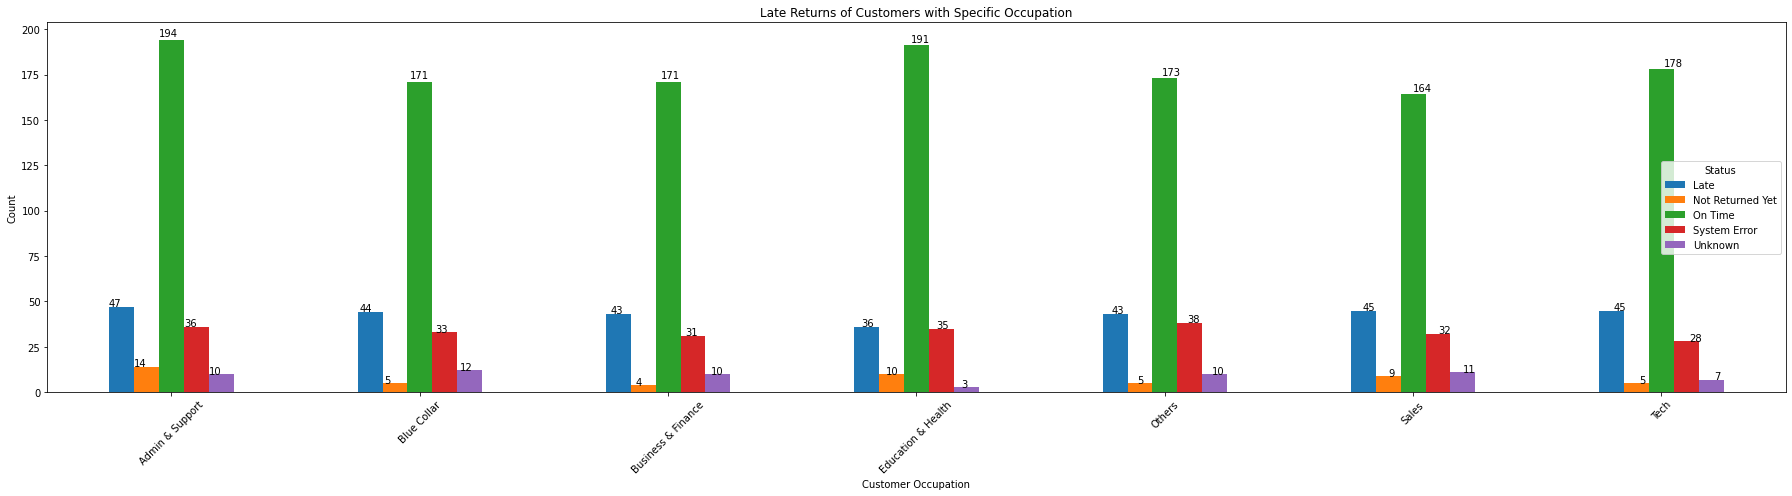

In [39]:
# Customer Occupation vs Return Status

late_returns_occupation = demographics_df[['customer_occupation', 'return_status']]
# late_returns_occupation = late_returns_occupation[late_returns_occupation['return_status'] == "Late"]

count_df = late_returns_occupation.groupby(['customer_occupation', 'return_status']).size().unstack()

ax = count_df.plot(kind='bar', stacked=False, figsize=(25, 7))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

plt.xlabel('Customer Occupation')
plt.ylabel('Count')
plt.title('Late Returns of Customers with Specific Occupation')
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribution is quite similar for all types of occupations. Hence nothing can be determined by this.

In [40]:
# Customer Age vs Return Status
from datetime import datetime

def calculate_age(dob):
    today = datetime.now()
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age

demographics_df['birth_date_customer'] = pd.to_datetime(demographics_df['birth_date_customer'])
demographics_df['customer_age'] = demographics_df['birth_date_customer'].apply(calculate_age)

demographics_df['customer_age'] = demographics_df['customer_age'].apply(lambda x: 0 if pd.isna(x) or x < 0 else int(x))

demographics_df

,postal_code_library,zipcode_customer,birth_date_customer,customer_gender,customer_education,customer_occupation,return_status,customer_age
0,NaN,97212.0,NaT,Female,NaN,Tech,System Error,0
1,97206.0,97202.0,1965-01-24,Female,Graduate Degree,Tech,On Time,59
2,97212.0,97212.0,1963-11-04,Male,Graduate Degree,Education & Health,Late,60
3,NaN,97227.0,2119-02-10,Male,Graduate Degree,Sales,Late,0
4,NaN,97218.0,2103-05-19,Female,Others,Business & Finance,System Error,0
...,...,...,...,...,...,...,...,...
1995,97217.0,97214.0,2120-08-25,Male,Graduate Degree,Education & Health,On Time,0
1996,97202.0,97267.0,1967-10-17,Female,High School,Education & Health,On Time,56
1997,97214.0,97218.0,1812-03-13,Female,High School,Education & Health,On Time,212
1998,97206.0,97266.0,1980-08-23,Male,Graduate Degree,NaN,On Time,43


In [49]:
# Age distribution of customers who returned their books late

late_age_df = demographics_df[(demographics_df['return_status'] == "Late") & (demographics_df['customer_age'] > 0) & (demographics_df['customer_age'] < 100)]

<Axes: ylabel='Count'>

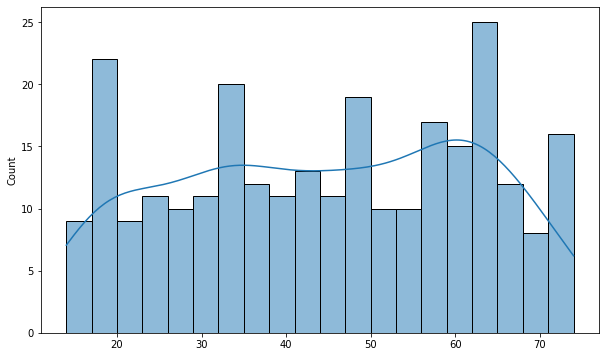

In [52]:
import seaborn as sns

ages = late_age_df['customer_age'].to_list()
plt.figure(figsize=(10, 6))
sns.histplot(ages, bins=20, kde=True)

Here are the following observations - 
1. Age: < 20 - This age group likely consists of school children. These young borrowers may not be fully aware of the library's 28-day return policy or may be more carefree about their responsibilities.
2. Age: early 30's and late 40's - This age group primarily comprises professional working individuals.  Due to their busy work schedules and numerous responsibilities, these individuals might frequently forget to return their books on time. Their late returns are likely due to the demands of balancing work and personal life.
3. Age: early 60's - This age group generally includes retired individuals. Retired people, who have more free time, might borrow books to enjoy during their leisure. However, they may also forget to return books on time, possibly due to a relaxed lifestyle or other personal engagements.

Remedy - 
By providing clear reminders for younger borrowers, sending frequent notifications to busy professionals, and offering flexible return options for retired individuals could be effective measures.

# ----------------------------------------------------------------------------------

# ROUGH

In [43]:
temp_df = library_records_df[['date_returned', 'return_status']]
temp_df = temp_df[(temp_df['return_status'] == "Late") & (temp_df["date_returned"].dt.year < 2100)]
# temp_df = temp_df[((temp_df['return_status'] == "Late") | (temp_df['return_status'] == "On Time")) & (temp_df["date_returned"].dt.year < 2100)]
temp_df.sort_values(by=['date_returned'], inplace=True)
temp_df

AttributeError: Can only use .dt accessor with datetimelike values

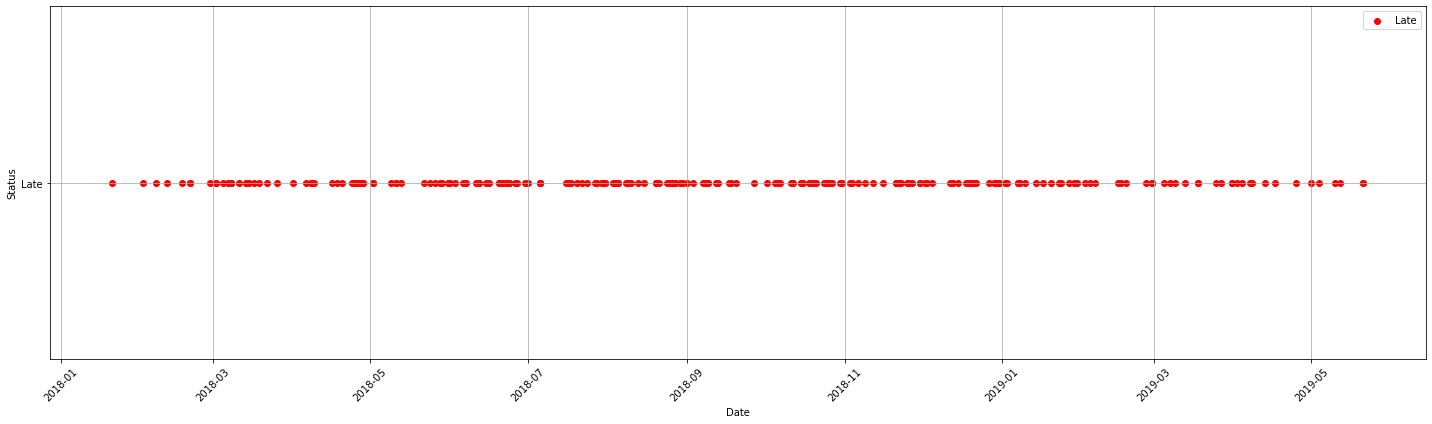

In [ ]:
min_date = temp_df['date_returned'].min()
max_date = temp_df['date_returned'].max()
date_range = pd.date_range(start=min_date, end=max_date)

complete_df = pd.DataFrame(date_range, columns=['date_returned'])

merged_df = pd.merge(complete_df, temp_df, on='date_returned', how='left')

plt.figure(figsize=(20, 6))

late_dates = merged_df[merged_df['return_status'] == 'Late']['date_returned']
plt.scatter(late_dates, ['Late'] * len(late_dates), color='red', label='Late')

# on_time_dates = merged_df[merged_df['return_status'] == 'On Time']['date_returned']
# plt.scatter(on_time_dates, ['On Time'] * len(on_time_dates), color='green', label='On Time')

plt.xlabel('Date')
plt.ylabel('Status')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()